# Titanic ML Competition

Task : Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Data : [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Project Outline

- Read Data
- Understand basics about the data
  - Row Count, Data Types, Missing Data
- Visualise Data
- Exploratory Analysis
  - Correlations
  - Interesting Themes
- Data Cleaning
- Feature Engineering
- Prepare Data for Model
  - One Hot Encoding
  - Scaling
- Model Building
- Model Evaluation
  - Baseline


## Import Packages

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import missingno as msno


## Read Data

In [6]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Dataset Basics

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


891 rows, 12 columns

- PassengerId: Unique Id of a passenger.
- Survived: Whether the passenger survived or not. 1 stands for survived and 0 stands for not survived.
- Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.
- Name: Passenger name
- Sex: Passenger gender
- Age: Passenger age
- SibSp: Number of siblings/spouses travelling with the passenger
- Parch: Number of parents/children travelling with the passenger
- Ticket: Ticket number
- Fare: Ticket Fare
- Cabin: Cabin number
- Embarked: Port from where the particular passenger was embarked/boarded.

In [10]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Looking for Missing Data

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

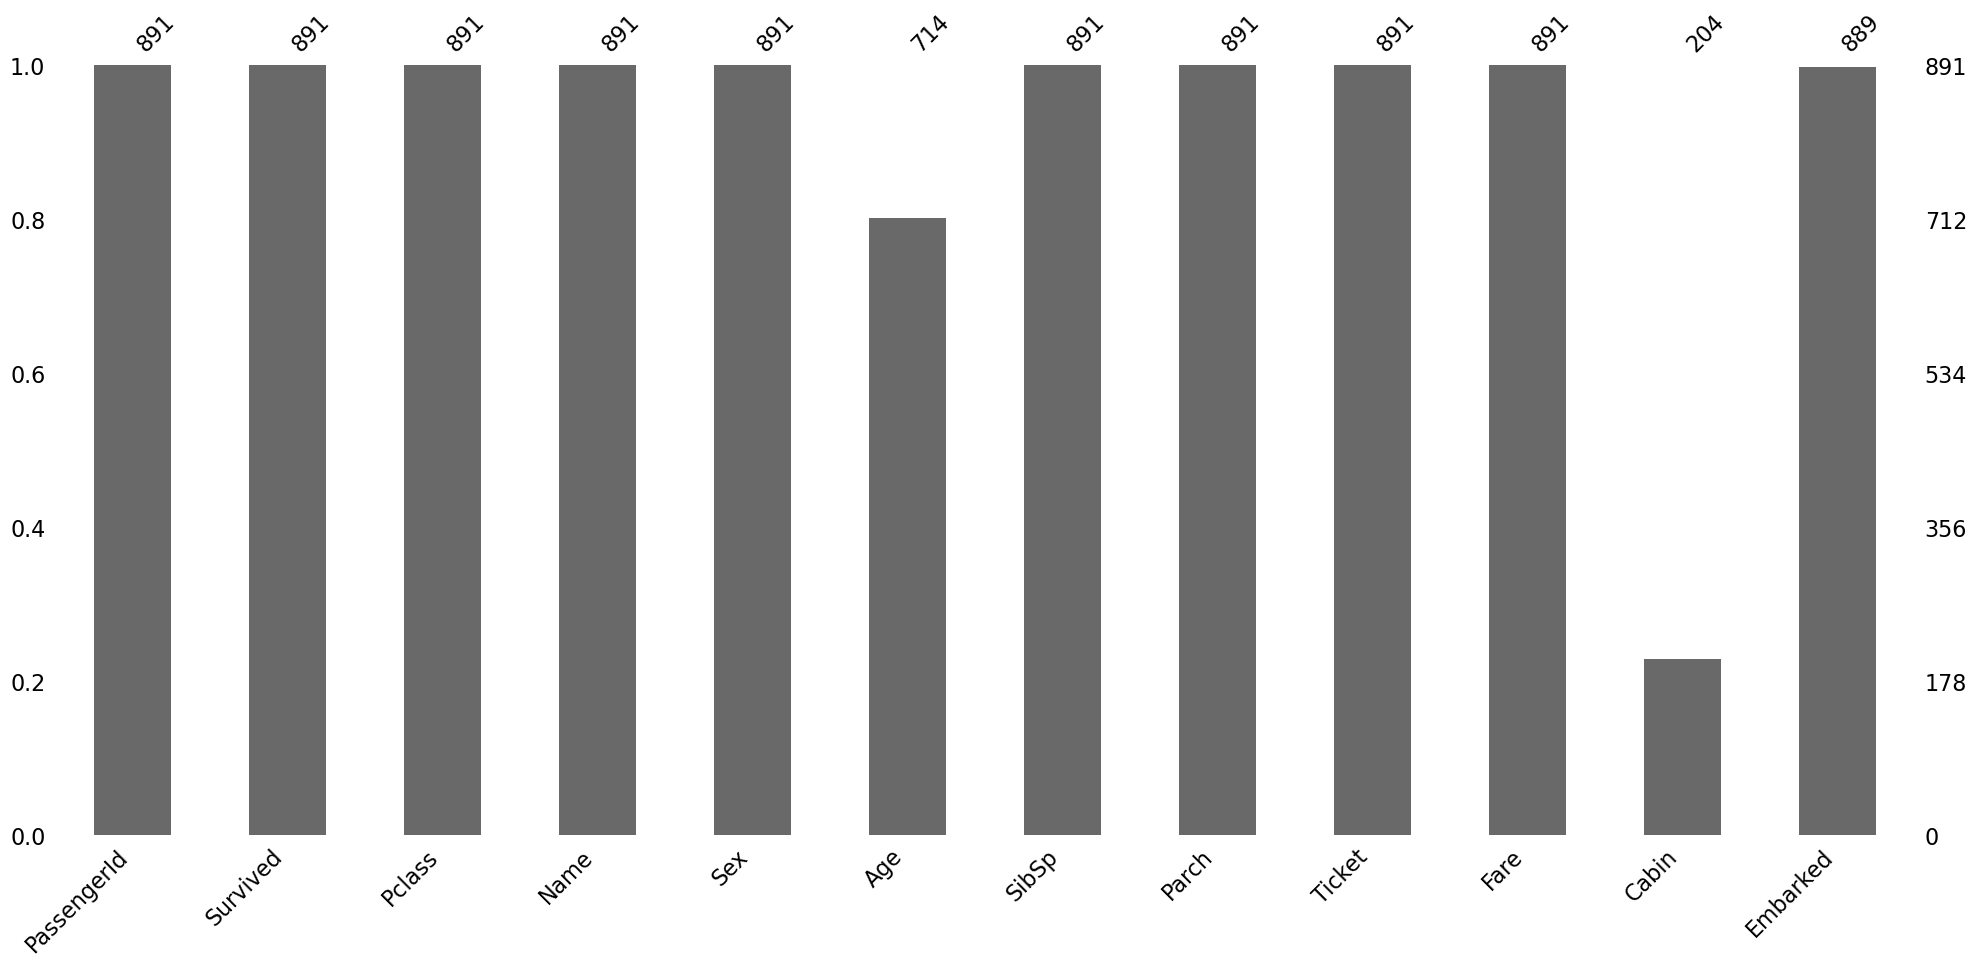

In [14]:
msno.bar(train)

- High number of missing values in Cabin column
- Age column has some missing values
- Embarked column has only 2 missing values

#### Nullity Correlation

<AxesSubplot: >

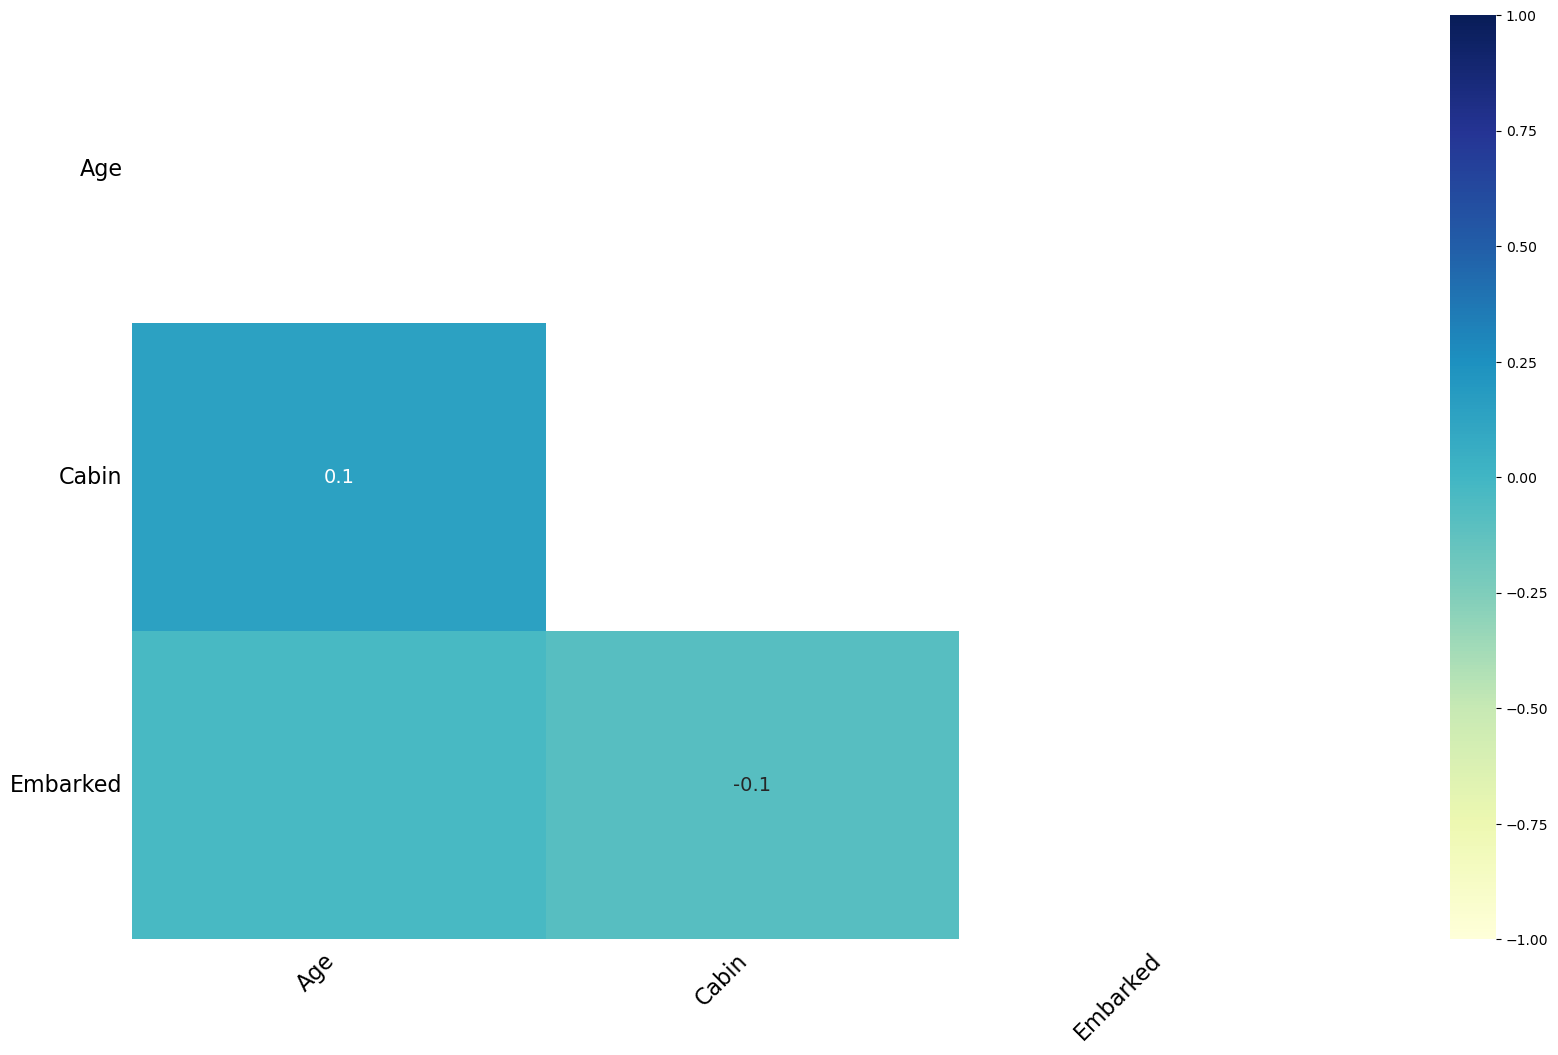

In [16]:
msno.heatmap(train, cmap='YlGnBu')

- None of the missing value columns are correlated with each other

#### Nullity Matrix

<AxesSubplot: >

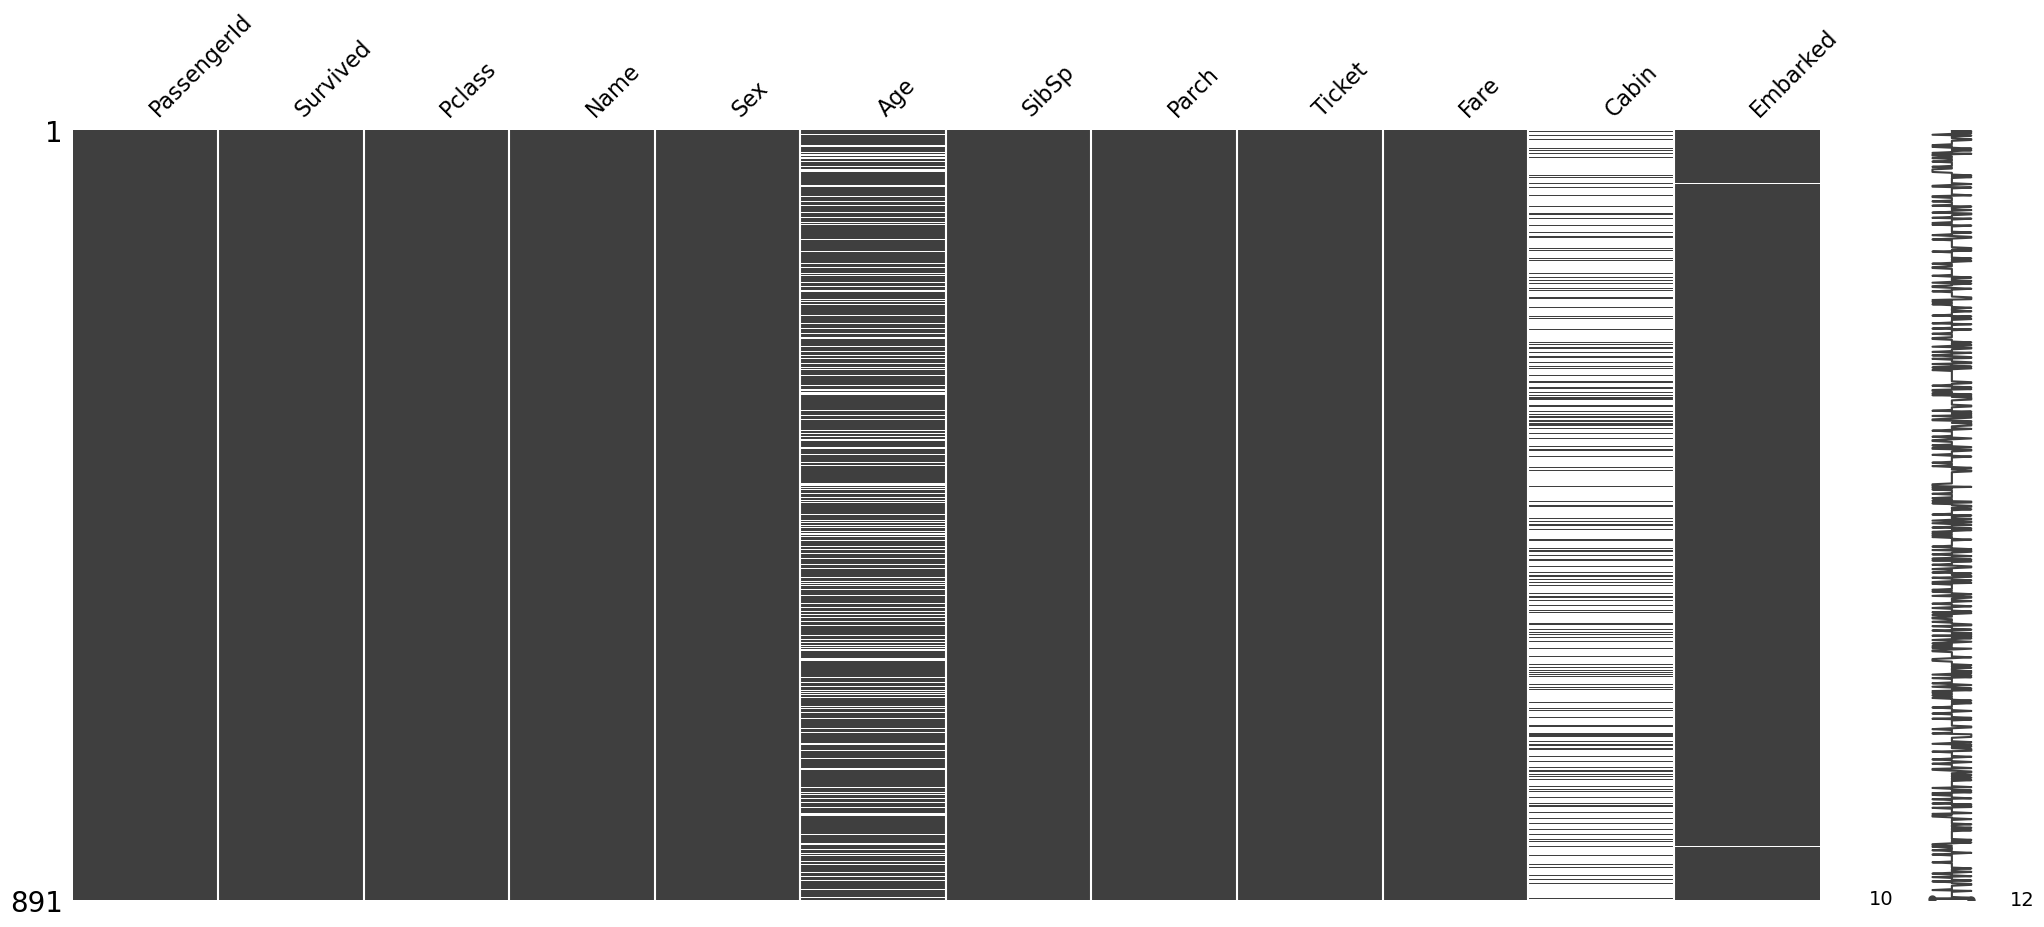

In [17]:
msno.matrix(train)

#### Nullity Dendrogram

<AxesSubplot: >

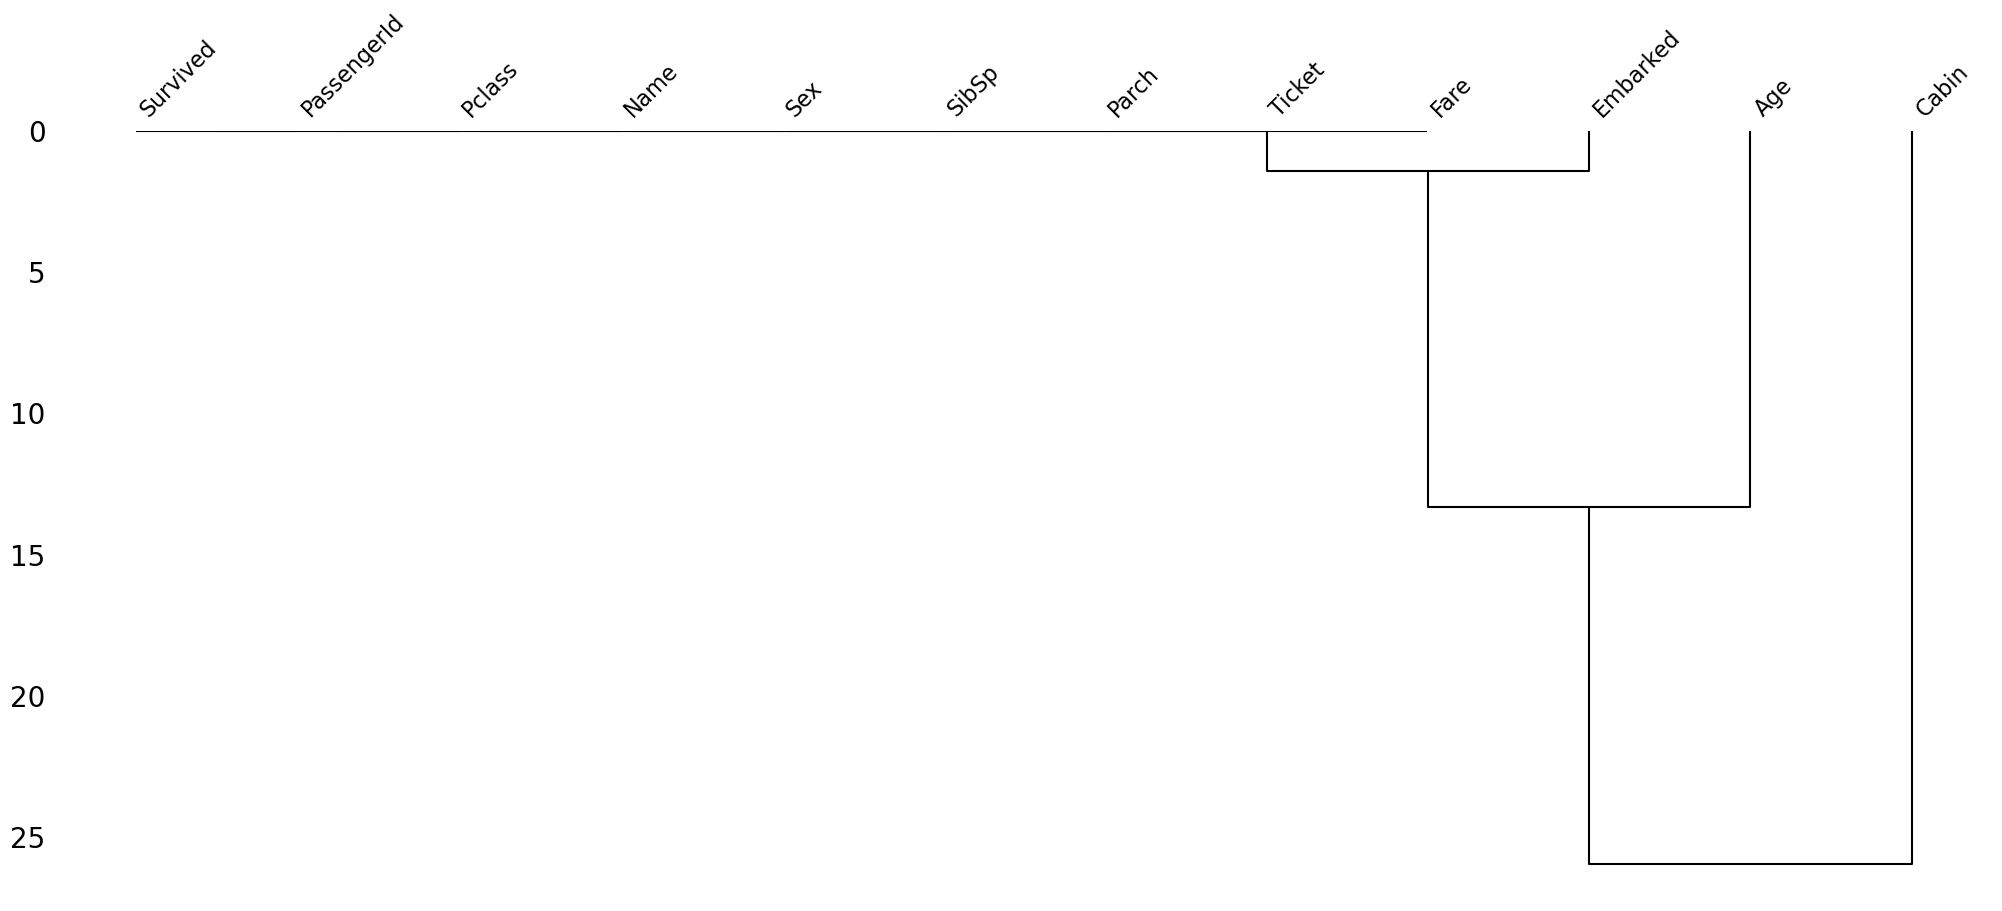

In [18]:
msno.dendrogram(train)

- Ticket and Embarked columns are closest to zero at the point of joining. Therefore we can say that they are most similar in nullity.